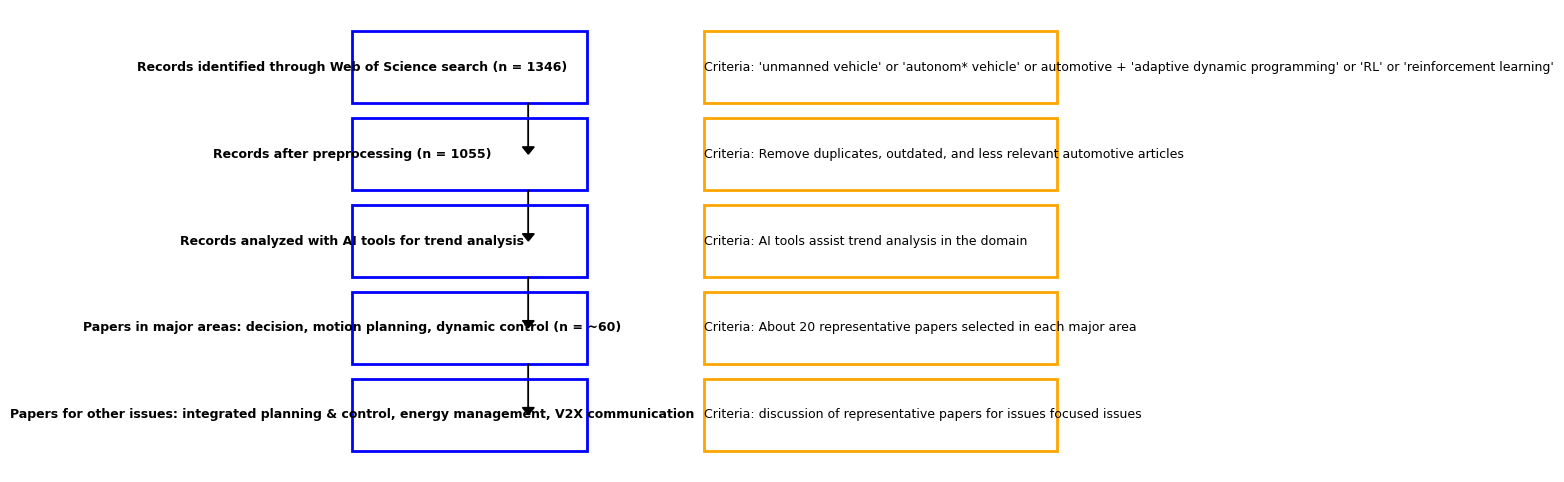

In [4]:
import matplotlib.pyplot as plt

# Define the data for the flowchart steps and criteria
steps = [
    "Records identified through Web of Science search (n = 1346)",
    "Records after preprocessing (n = 1055)",
    "Records analyzed with AI tools for trend analysis",
    "Papers in major areas: decision, motion planning, dynamic control (n = ~60)",
    "Papers for other issues: integrated planning & control, energy management, V2X communication"
]

criteria = [
    "Criteria: 'unmanned vehicle' or 'autonom* vehicle' or automotive + 'adaptive dynamic programming' or 'RL' or 'reinforcement learning'",
    "Criteria: Remove duplicates, outdated, and less relevant automotive articles",
    "Criteria: AI tools assist trend analysis in the domain",
    "Criteria: About 20 representative papers selected in each major area",
    "Criteria: discussion of representative papers for issues focused issues"
]

# Define a function to draw a single block of the flowchart
def draw_block(ax, step_text, criteria_text, y_position):
    # Draw the block
    ax.add_patch(plt.Rectangle((-1, y_position), 2, 1, fill=None, edgecolor='blue', lw=2))
    ax.text(-1, y_position + 0.5, step_text, ha='center', va='center', fontsize=9, weight='bold')
    # Draw the criteria box
    ax.add_patch(plt.Rectangle((2, y_position), 3, 1, fill=None, edgecolor='orange', lw=2))
    ax.text(2, y_position + 0.5, criteria_text, ha='left', va='center', fontsize=9)

# Initialize the plot
fig, ax = plt.subplots(figsize=(10, 6))
ax.axis('off')

# Define the starting y-position
y_position = 4

# Draw the blocks and arrows
for i in range(len(steps)):
    draw_block(ax, steps[i], criteria[i], y_position)
    # Connect the blocks with arrows if not the last block
    if i < len(steps) - 1:
        ax.arrow(0.5, y_position, 0, -0.6, head_width=0.1, head_length=0.1, fc='black', ec='black')
    y_position -= 1.2  # Update the y-position for the next block

# Display the plot
plt.show()


In [2]:
import sqlite3

# Connect to the database
conn = sqlite3.connect('output\\papers.db')

# Create a cursor object
cursor = conn.cursor()

# 执行查询
cursor.execute("PRAGMA table_info(papers)")

# 获取查询结果
columns = cursor.fetchall()

# 打印表头
for column in columns:
    print(column[1])
# 执行查询
cursor.execute("SELECT COUNT(*) FROM papers")

# 获取查询结果
rows = cursor.fetchone()

# 打印行数
print(f'Total rows: {rows[0]}')



publication_type
authors
title
publication_year
publication_name
conference_name
start_page
end_page
abstract
document_type
publication_date
doi
methods
domains
Total rows: 884


In [8]:
import pandas as pd

# 从数据库中读取数据
df = pd.read_sql_query("SELECT * FROM papers", conn)

# 获取domain所有可能的值
domains = df['domains'].unique()

# 打印结果
for domain in domains:
    print(domain)

Vehicle Control
Behavior Decision
Vehicle-to-Everything (V2X) Communication
Not Specified
Motion Planning
Traffic Efficiency
Risk Assessment
Local Path Planning
Velocity Control
Energy Management
Energy Efficiency
Trajectory Optimization
Dynamic Pricing
Lateral Control
Collision Avoidance
Perception
Map Integration
Dynamic Obstacle Avoidance
Generative Design
Visual Active Tracking
Cloud Resource Allocation
Energy and Emission Management
Attitude Control
Energy Optimization
Safety Assurance
Safety Control
Intersection Crossing
Path Planning
Human-Robot Collaboration
Control Engineering
Emission Control
Powertrain Control
Energy Storage System Optimization
Energy Control
Traction Control
Operational Policies
Robot Navigation
Automotive Control
Control Systems
Autonomous Navigation
Supply Chain Logistics
Path Tracking
Temperature Control
Quality Control
Path Tracking Control
Design Space Exploration
Safety and Security Co-Analysis of Cyber-Physical Systems
Energy-Emission Management
Coll

In [10]:
# 找到domains是Velocity Control 或者 Lateral Control 的行
selected_rows = df.loc[df['domains'].isin(['Behavior Decision','Dynamic Obstacle Avoidance'])]

# 给出这些行的dio authors的第一个 发表年限 和methods
result = selected_rows[['dio', 'authors', 'publication_year','publication_name', 'methods']]

# 如果authors是一个列表，只保留第一个作者
result['authors'] = result['authors'].apply(lambda x: x[0] if isinstance(x, list) else x)

print(result.to_markdown())

KeyError: "['dio'] not in index"

In [22]:
# 找到domains是Velocity Control 或者 Lateral Control 的行，并且年份是2023或2024
selected_rows_latest = selected_rows[selected_rows['publication_year'].isin(['2023', '2024'])]

# 给出这些行的dio authors的第一个 发表年限 和methods
result = selected_rows_latest[['doi', 'authors', 'publication_year','publication_name', 'methods']]

print(result.to_markdown())

|     | doi                              | authors                                                                                                                        |   publication_year | publication_name                                                                                                                                                            | methods                                   |
|----:|:---------------------------------|:-------------------------------------------------------------------------------------------------------------------------------|-------------------:|:----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|:------------------------------------------|
| 140 | 10.3390/ijerph20010893           | Chen, Jing; Zhao, Cong; Jiang, Shengchuan; Zhang, Xinyuan; Li, Zhongxin; Du, Yuchuan                                           |       

In [13]:
import pandas as pd

def load_data(file_path):
    df = pd.read_csv(file_path, sep='\t', encoding='utf-8', dtype=str)
    df.fillna('', inplace=True)  # 用空字符串替换NaN值
    return df

# 使用示例
df = load_data('output\\savedrecs_UDRL_SortCitations_tagged.txt')
df_all = load_data('test_files\\savedrecs_UDRL_SortCitations.txt')
print(df.columns)

Index(['PT', 'AU', 'TI', 'PY', 'SO', 'SE', 'BP', 'EP', 'AB', 'DT', 'PD', 'DI',
       'methods', 'domains', 'IF', 'Cite', 'partition'],
      dtype='object')


In [30]:
column = 403
# 140 196 216 337 83 636
# 根据df的DI列，从df_all中找到对应的行

row = df.iloc[column] 
print(row['AU'])
print(row['TI'])
print(row['AB'])

row_allinfo = df_all[df_all['DI'] == row['DI']]
print(row_allinfo['DI'])

Wang, Chengyu; Wang, Luhan; Lu, Zhaoming; Chu, Xinghe; Shi, Zhengrui; Deng, Jiayin; Su, Tianyang; Shou, Guochu; Wen, Xiangming
SRL-TR<SUP>2</SUP>: A <i>S</i>afe <i>Re</i>inforcement <i>L</i>earning Based <i>TR</i>ajectory <i>TR</i>acker Framework
This paper aims to solve the trajectory tracking con-trol problem for an autonomous vehicle based on reinforcement learning methods. Existing reinforcement learning approaches have found limited successful applications on safety-critical tasks in the real world mainly due to two challenges: 1) sim-to-real transfer; 2) closed-loop stability and safety concern. In this paper, we propose an actor-critic-style framework SRL-TR2, in which the RL-based TRajectory TRackers are trained under the safety constraints and then deployed to a full-size vehicle as the lateral controller. To improve the generalization ability, we adopt a light-weight adapter State and Action Space Alignment (SASA) to establish mapping relations between the simulation and real

In [26]:
# 生成对应格式格式的参考文献

'''
\bibitem{yang2018leader}
Yongliang Yang, Hamidreza Modares, Donald~C Wunsch, and Yixin Yin.
\newblock Leader--follower output synchronization of linear heterogeneous systems with active leader using reinforcement learning.
\newblock {\em IEEE transactions on neural networks and learning systems}, 29(6):2139--2153, 2018.
'''

cititions_tp = [88,92,227,124,195,570,581,51,53,207,122,389,247,294,223,250,558,511,590,297]
cititions_vc = [264,217,57,33,337,403,140,196,216,175,362,161,85,216,337,83,636,403]
cititions_e2e= [627,6,355,486,397,546]

def get_citation(df, df_all, column):
    _row = df.iloc[column]
    row = df_all[df_all['DI'] == _row['DI']].iloc[0]
    authors = row['AU']
    title = row['TI']
    journal = row['SO']
    volume = row['VL']
    number = row['IS']
    pages = row['BP'] + '--' + row['EP']
    year = row['PY']
    return f"\\bibitem{{{column}}}\n{authors}.\n\\newblock {title}.\n\\newblock {{\\em {journal}}}, {volume}({number}):{pages}, {year}."


for i in cititions_tp:
    print(get_citation(df,df_all,i))
    print()

\bibitem{88}
Yudin, D. A.; Skrynnik, A.; Krishtopik, A.; Belkin, I; Panov, A., I.
\newblock Object Detection with Deep Neural Networks for Reinforcement Learning in the Task of Autonomous Vehicles Path Planning at the Intersection.
\newblock {\em OPTICAL MEMORY AND NEURAL NETWORKS}, 28(4):283--295, 2019.

\bibitem{92}
Duy Quang Tran; Bae, Sang-Hoon.
\newblock Proximal Policy Optimization Through a Deep Reinforcement Learning Framework for Multiple Autonomous Vehicles at a Non-Signalized Intersection.
\newblock {\em APPLIED SCIENCES-BASEL}, 10(16):--, 2020.

\bibitem{227}
Liu, Yuqi; Gao, Yinfeng; Zhang, Qichao; Ding, Dawei; Zhao, Dongbin.
\newblock Multi-task safe reinforcement learning for navigating intersections in dense traffic.
\newblock {\em JOURNAL OF THE FRANKLIN INSTITUTE-ENGINEERING AND APPLIED MATHEMATICS}, 360(17):13737--13760, 2023.

\bibitem{124}
Zhou, Weitao; Jiang, Kun; Cao, Zhong; Deng, Nanshan; Yang, Diange.
\newblock Integrating Deep Reinforcement Learning with Optima

In [27]:
for i in cititions_vc:
    print(get_citation(df,df_all,i))
    print()

\bibitem{264}
Ma, Jichang; Xie, Hui; Song, Kang; Liu, Hao.
\newblock Self-Optimizing Path Tracking Controller for Intelligent Vehicles Based on Reinforcement Learning.
\newblock {\em SYMMETRY-BASEL}, 14(1):--, 2022.

\bibitem{217}
Liessner, Roman; Dohmen, Jan; Wiering, Marco.
\newblock Explainable Reinforcement Learning for Longitudinal Control.
\newblock {\em ICAART: PROCEEDINGS OF THE 13TH INTERNATIONAL CONFERENCE ON AGENTS AND ARTIFICIAL INTELLIGENCE - VOL 2}, ():874--881, 2021.

\bibitem{57}
Perez-Gil, Oscar; Barea, Rafael; Lopez-Guillen, Elena; Bergasa, Luis M.; Gomez-Huelamo, Carlos; Gutierrez, Rodrigo; Diaz-Diaz, Alejandro.
\newblock Deep reinforcement learning based control for Autonomous Vehicles in CARLA.
\newblock {\em MULTIMEDIA TOOLS AND APPLICATIONS}, 81(3):3553--3576, 2022.

\bibitem{33}
Gao, Weinan; Gao, Jingqin; Ozbay, Kaan; Jiang, Zhong-Ping.
\newblock Reinforcement-Learning-Based Cooperative Adaptive Cruise Control of Buses in the Lincoln Tunnel Corridor with Time-Va

In [28]:
for i in cititions_e2e:
    print(get_citation(df,df_all,i))
    print()

\bibitem{627}
S, N.F.; Naeemi, S.; Shamchi, S.H.; Nahvi, A..
\newblock Autonomous Merging onto the Highway Using LSTM Neural Network.
\newblock {\em 2023 11th RSI International Conference on Robotics and Mechatronics (ICRoM)}, ():574--9, 2023.

\bibitem{6}
Amini, Alexander; Gilitschenski, Igor; Phillips, Jacob; Moseyko, Julia; Banerjee, Rohan; Karaman, Sertac; Rus, Daniela.
\newblock Learning Robust Control Policies for End-to-End Autonomous Driving From Data-Driven Simulation.
\newblock {\em IEEE ROBOTICS AND AUTOMATION LETTERS}, 5(2):1143--1150, 2020.

\bibitem{355}
Chung, Seung-Hwan; Kong, Seung-Hyun; Cho, Sangjae; Nahrendra, I. Made Aswin.
\newblock Segmented Encoding for Sim2Real of RL-based End-to-End Autonomous Driving.
\newblock {\em 2022 IEEE INTELLIGENT VEHICLES SYMPOSIUM (IV)}, ():1290--1296, 2022.

\bibitem{486}
Zhou, C.; Liao, M.; Jiao, L.; Tao, F..
\newblock Lane Change Decision Control of Autonomous Vehicle Based on A3C Algorithm.
\newblock {\em Cognitive Systems and Inf